In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/Rainfall.csv')

In [64]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [65]:
df['rainfall'].value_counts()

,count
rainfall,
yes,249
no,117


In [66]:
df.shape

(366, 12)

In [67]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [69]:
df.describe()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [70]:
#remove spaning in all columns

df.columns = df.columns.str.strip()

In [71]:
# df.info()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [72]:
df = df.drop(['day'], axis=1)

In [73]:
df.head(1)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3


In [74]:
#handle missing values

df['winddirection'].unique()


array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [75]:
mode_val = df['winddirection'].mode()

mode_val

,winddirection
0,20.0


In [76]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [77]:
df['winddirection'] = df['winddirection'].fillna(mode_val[0])

In [78]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [79]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [80]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [81]:
df['rainfall'] = df['rainfall'].map({'no':0, 'yes':1})

In [82]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [83]:
#EDA

sns.set(style='whitegrid')

In [84]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


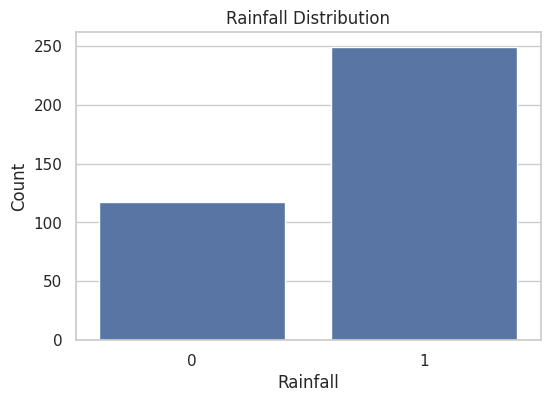

In [85]:
plt.figure(figsize=(6,4))

sns.countplot(x='rainfall', data=df)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.show()

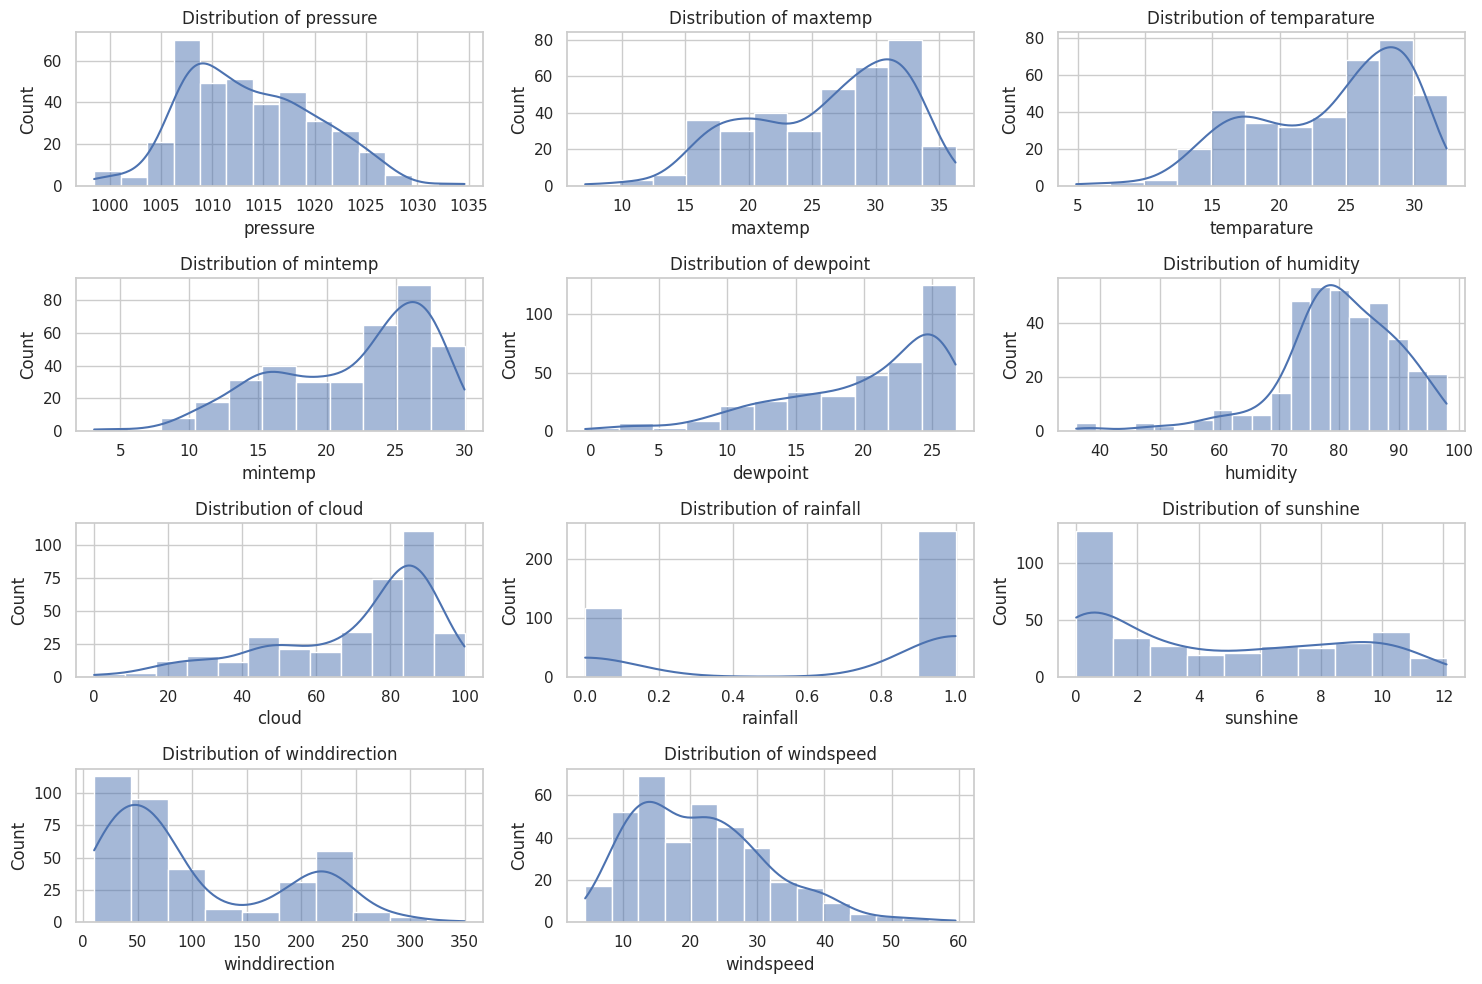

In [86]:
plt.figure(figsize=(15,10))
for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],1):
  plt.subplot(4,3,i)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

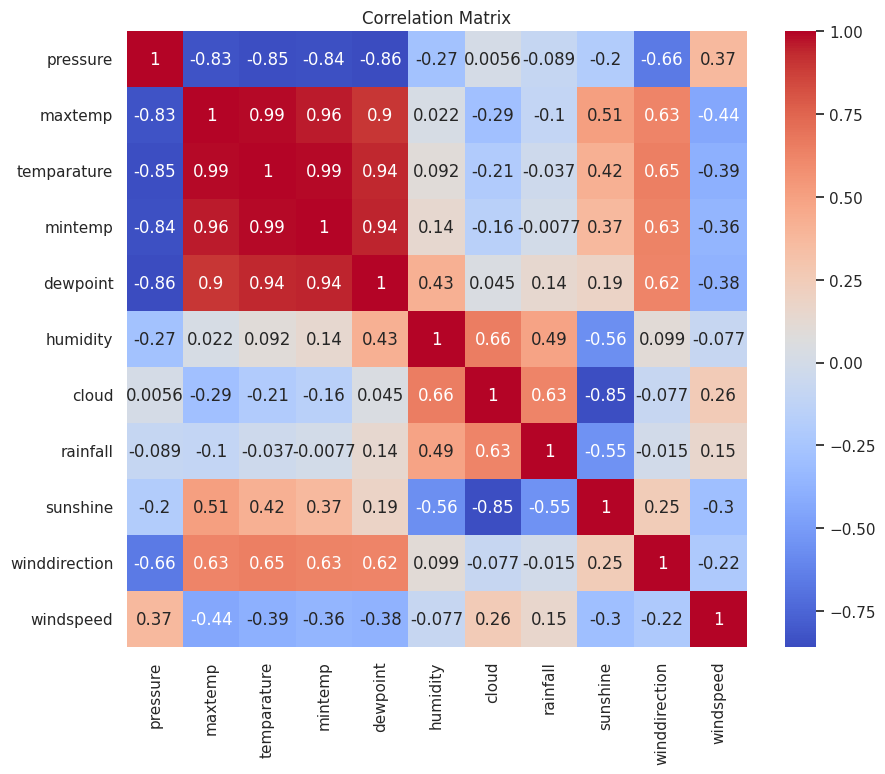

In [87]:
#correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

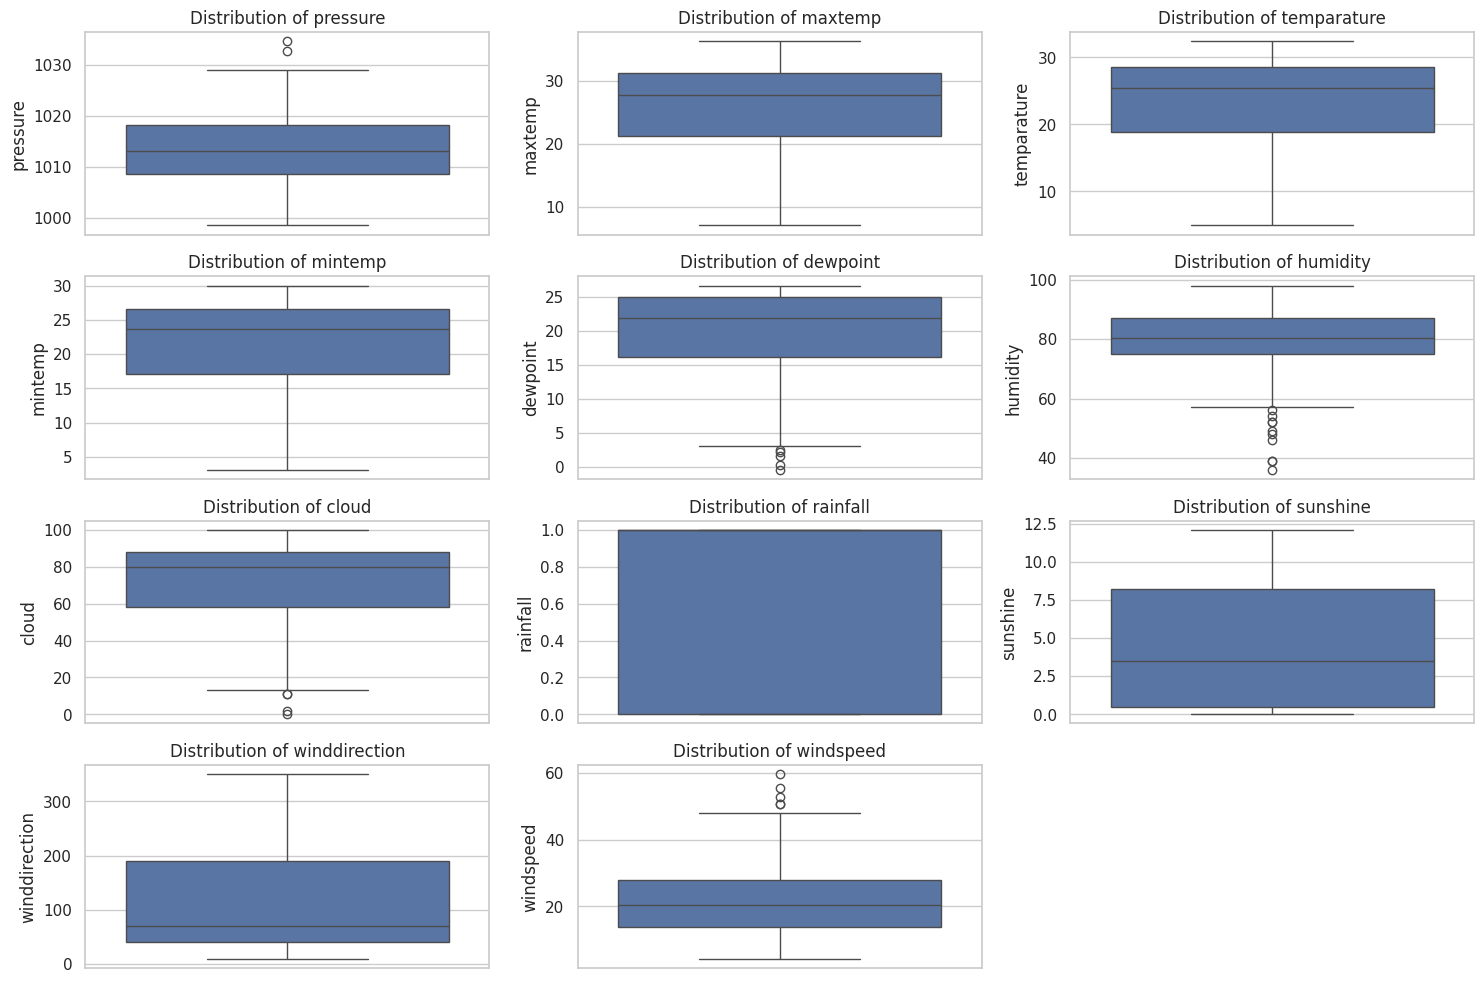

In [88]:
plt.figure(figsize=(15,10))
for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],1):
  plt.subplot(4,3,i)
  sns.boxplot(df[column])
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [89]:
# data pre processing
#drop highly correlated columns

df = df.drop(['maxtemp', 'mintemp', 'dewpoint'], axis=1)





In [90]:
df.head()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,95,81,1,0.0,40.0,13.7


In [91]:
#perform downsampling

df_majority = df[df['rainfall']==1]
df_minority = df[df['rainfall']==0]

In [92]:
df_majority.shape

(249, 8)

In [93]:
df_minority.shape

(117, 8)

In [94]:
#downsample majority class to match minority

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [95]:
df_majority_downsampled.shape

(117, 8)

In [96]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [97]:
df_downsampled.head()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,30.2,77,53,1,10.5,270.0,11.3
9,1017.5,18.0,85,91,1,0.0,70.0,37.7
137,1012.3,23.7,80,86,1,0.3,80.0,39.5
89,1018.3,20.0,79,89,1,2.4,40.0,14.8
157,1008.8,26.2,91,80,1,2.2,20.0,11.2


In [98]:
#shuffle the final dataframe

df_downsampled =df_downsampled.sample(
    frac=1,
    random_state=42
).reset_index(drop=True)

In [99]:
df_downsampled.head()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,18.0,78,90,1,0.0,30.0,28.5
1,1013.4,26.2,69,17,0,10.5,70.0,12.4
2,1006.1,29.6,74,27,0,10.8,220.0,8.7
3,1007.6,27.6,85,84,1,1.8,70.0,34.8
4,1021.2,14.8,66,18,0,10.1,20.0,24.4


In [100]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [101]:
#split into target and features

X=df_downsampled.drop('rainfall', axis=1)
y=df_downsampled['rainfall']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 7)
(47, 7)
(187,)
(47,)


model training

In [104]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

param_grid = {
    'n_estimators': [50, 100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}





In [ ]:
#Hyperparameter tunning using GridSearchCV

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)


In [ ]:

best_score = grid_search.best_score_
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best Cross-Validation Score:", best_score)
print("Cross-validation score:",cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


In [ ]:
#test set performance

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))



In [ ]:
#predictive system

# input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_data = (1013.4,26.2,69,17,10.5,70.0,12.4)
input_df =pd.DataFrame([input_data], columns=X.columns)




In [ ]:
input_df

In [ ]:
prediction = best_rf_model.predict(input_df)
print('Prediction result:',"Rainfall" if prediction[0]==1 else "No Rainfall")


In [ ]:
#save model and feature names in pickle file

model_data ={
    "model":best_rf_model,
    "features":list(X.columns)
}

with open('model.pkl', 'wb') as file:
  pickle.dump(model_data, file)



In [ ]:
#load pickle file for infernence

with open('model.pkl', 'rb') as file:
  model_data = pickle.load(file)

  model = model_data['model']
  features = model_data['features']

  print(features)
  print(model)
  print(model_data)




In [ ]:


  input_data = (1013.4,26.2,69,17,10.5,70.0,12.4)

  input_df =pd.DataFrame([input_data], columns=features)

  prediction = model.predict(input_df)
  print('Prediction result:',"Rainfall" if prediction[0]==1 else "No Rainfall")






try :

SMOTE
PCA for dimensionality reduction
Simple models like Logistic regression

Model Selection with hyperparameters tunning